<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/KYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Need FASTAI V1

In [1]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

Name: tensorflow
Version: 1.13.0rc1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: protobuf, grpcio, termcolor, six, gast, keras-preprocessing, tensorboard, absl-py, astor, tensorflow-estimator, numpy, wheel, keras-applications
Required-by: stable-baselines, magenta, fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.0rc1)


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

In [3]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 27kB/s 


In [4]:
import torch
print(torch.__version__)
!pip install torchtext==0.2.3
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

1.0.0.dev20181206
    100% |████████████████████████████████| 51kB 2.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [5]:
!pip install fastai

  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: wrapt 1.11.1
    Uninstalling wrapt-1.11.1:
      Successfully uninstalled wrapt-1.11.1


In [0]:
from fastai import *
from fastai.vision import *
import pandas as pd 

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 16

#  KYC Image Dataset

## Looking at the data

###Getting Dataset from Google

Data is downloaded from Google Images using the chrome extension Fatkun Image Downloader and ensured manually that we have clean data

In [0]:
!mkdir data
!unzip KYC.zip -d data

In [9]:
"""
from PIL import Image 
import glob, os
directory = "content/data"
for infile in glob.glob("*.png"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    rgb_im = im.convert('RGB')
    rgb_im.save(directory + file + ".jpg", "JPG")
for infile in glob.glob("*.PNG"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    rgb_im = im.convert('RGB')
    rgb_im.save(directory + file + ".jpg", "JPG") 
"""

'\nfrom PIL import Image \nimport glob, os\ndirectory = "content/data"\nfor infile in glob.glob("*.png"):\n    file, ext = os.path.splitext(infile)\n    im = Image.open(infile)\n    rgb_im = im.convert(\'RGB\')\n    rgb_im.save(directory + file + ".jpg", "JPG")\nfor infile in glob.glob("*.PNG"):\n    file, ext = os.path.splitext(infile)\n    im = Image.open(infile)\n    rgb_im = im.convert(\'RGB\')\n    rgb_im.save(directory + file + ".jpg", "JPG") \n'

###Setting the path for data

We are going to use the dataset downloaded and cleaned from Google Image search 
and we start with 5 classes:-

1.   AADHAR
2.   DL
3.   PAN CARD
4.   PASSPORT
5.   VOTER ID




Our model will need to learn to differentiate between these 5 distinct categories. 
We use **FASTAI-V1** model to get the results.

In [10]:
path='data/KYC/'
os.listdir('data/KYC')

['VOTER ID', 'AADHAR', 'PASSPORT', 'DL', '.DS_Store', 'PAN CARD']

###Loading and Understanding the Data
The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data, means **understanding how the data directories are structured**, what the **labels** are and what some **sample images** look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, **5 labels**are stored based on the folders.

Fortunately, the fastai library has a handy function made exactly for this.

[Image data from folder ](https://docs.fast.ai/vision.data.html#ImageDataBunch.from_folder).

##Loading Labels [From_Folders](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L108)

from_folder(path:PathOrStr, train:PathOrStr='train', valid:PathOrStr='valid', valid_pct=None, classes:Collection=None, kwargs:Any) → ImageDataBunch

Create from imagenet style dataset in path with train,valid,test subfolders (or provide valid_pct).

"Imagenet-style" datasets look something like this (note that the test folder is optional):

**File Structure**

path\

    KYC\
        AADHAR\
        DL\
        PAN CARD\
        ...

In [0]:
tfms = get_transforms(do_flip=True)
data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())

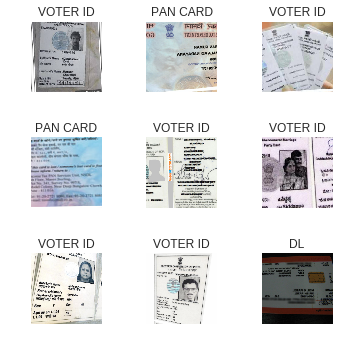

In [12]:
data.show_batch(rows=3, figsize=(5,5))

In [13]:
print(data.classes)
len(data.classes),data.c

['AADHAR', 'DL', 'PAN CARD', 'PASSPORT', 'VOTER ID']


(5, 5)

# Training: resnet34

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet34 has 34 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet34 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
#For Metrics to have Top 3 results
from fastai import *
from sklearn import metrics as skm

In [15]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 89723749.72it/s]


In [16]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.63E-03


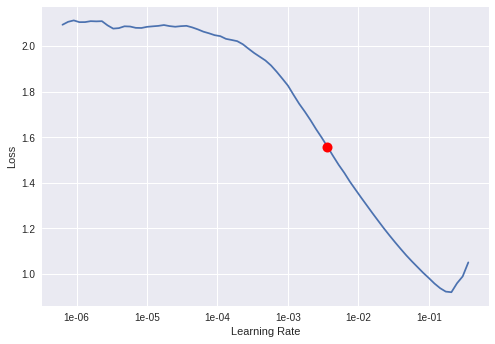

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(6) ## best way to fit as of 2018
print("learning complete")

epoch,train_loss,valid_loss,accuracy
1,2.071393,2.027391,0.171429
2,1.819613,1.400885,0.371429
3,1.443731,0.913850,0.571429
4,1.185047,0.607125,0.828571
5,0.998459,0.446828,0.885714
6,0.875071,0.360464,0.885714


learning complete


In [19]:
print("we save after 1st weights are learned")
learn.save('stage-1-34')

we save after 1st weights are learned


Let's see if full fine-tuning helps:

In [20]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.324718,0.280849,0.914286
2,0.266312,0.157675,0.942857
3,0.250957,0.096086,1.000000
4,0.211573,0.065352,1.000000
5,0.184758,0.050615,1.000000
6,0.159703,0.043928,1.000000


In [21]:
learn.save('stage-2-34')
print("we save after 2nd weights are learned")

we save after 2nd weights are learned


If it doesn't, you can always go back to your previous model.

In [22]:
#!mv chromestage-2-50.pth data/train/models/chromestage-2-50.pth
print("weights loaded")

weights loaded


In [0]:
learn.load('stage-2-34');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

**interp.plot_top_losses(9, figsize=(15,11)) # Prediction/ Actual/ Loss/ Probability**

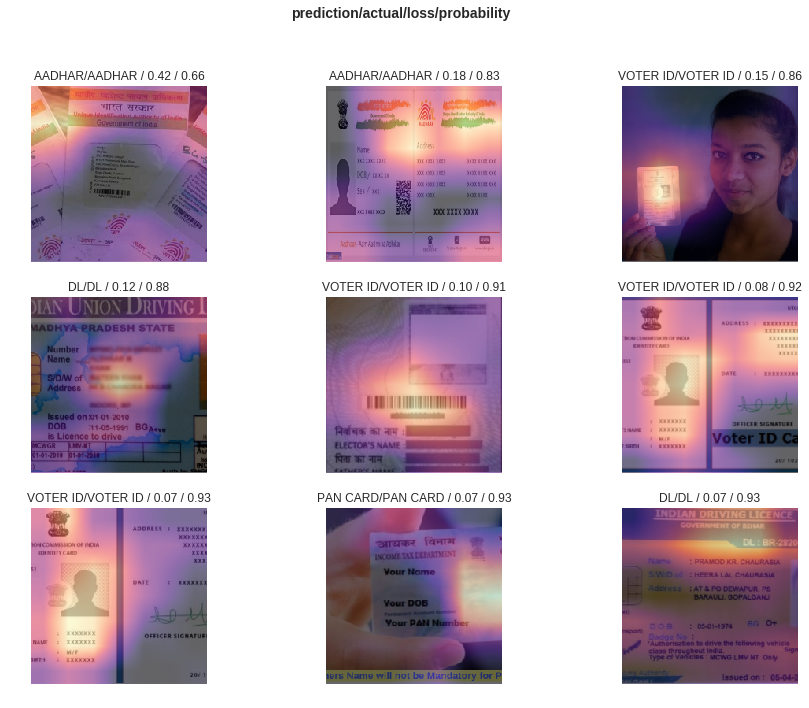

In [25]:
interp.plot_top_losses(9, figsize=(15,11)) # Prediction/ Actual/ Loss/ Probability

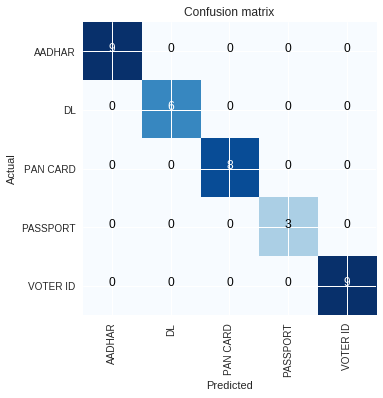

In [26]:
interp.plot_confusion_matrix()



---

